In [113]:
%matplotlib inline
import pandas as pd
import seaborn as sbn
import json

In [92]:
from bs4 import BeautifulSoup
import requests
import csv

In [2]:
t=requests.get("http://www.the-numbers.com/movie/records/All-Time-Domestic-Box-Office")

In [46]:
soup = BeautifulSoup(t.text)

/usr/local/lib/python3.5/site-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [6]:
allrows=soup.find_all('tr')

In [145]:
dictn = {'ryear':[], 'title':[], 'DBO':[], 'IBO':[], 'WWBO':[]}
for arow in allrows[1:1+101-1]:
    tds = arow.find_all('td')
    rank = int(tds[0].text)
    year = int(tds[1].text)
    title = tds[2].text
    DBO = int(tds[3].text.strip('$').replace(',',''))
    IBO = int(tds[4].text.strip('$').replace(',',''))
    WWBO = int(tds[5].text.strip('$').replace(',',''))
    
    dictn['DBO'].append(DBO)
    dictn['IBO'].append(IBO)
    dictn['WWBO'].append(WWBO)
    dictn['ryear'].append(year)
    dictn['title'].append(title)
                    

In [141]:
df=pd.DataFrame(dictn)

In [153]:
df.sort(['ryear', 'title', 'DBO', 'IBO', 'adj_DBO'], ascending = False)

,DBO,IBO,WWBO,ryear,title,adj_DBO
39,341268248,680500000,1021768248,2016,Zootopia,3.472156e+08
33,362020120,429441164,791461284,2016,The Secret Life of Pets,3.683292e+08
31,363940561,599900000,963840561,2016,The Jungle Book,3.702831e+08
57,308363870,392000000,700363870,2016,Suicide Squad,3.137378e+08
6,483597782,467000000,950597782,2016,Finding Dory,4.920256e+08
32,363070709,420700000,783770709,2016,Deadpool,3.693981e+08
18,408063896,743600000,1151663896,2016,Captain America: Civil War,4.151754e+08
45,330360194,537800000,868160194,2016,Batman v Superman: Dawn of Justice,3.361175e+08
77,281723902,368799525,650523427,2015,The Hunger Games: Mockingjay - Part 2,2.887246e+08
0,936662225,1122000000,2058662225,2015,Star Wars Ep. VII: The Force Awakens,9.599380e+08


In [70]:
def wrapper (the_row):
    return get_adjusted_price(the_row.year, the_row.domestic)
df.apply(foo, axis=1)



'Connected: beyeas01@world'

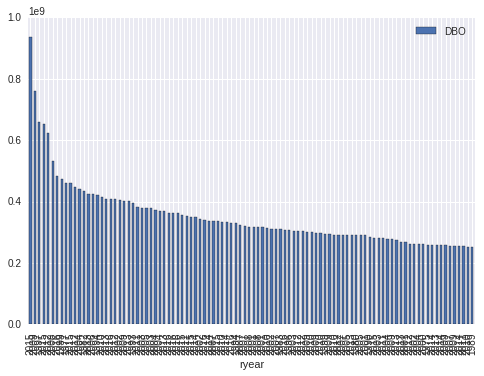

In [82]:
df.plot(x = "ryear", y = "DBO", kind = "bar")


In [90]:
df.to_csv('boxoffice.csv')

In [97]:
r= requests.get("https://www.statbureau.org/get-data-json?country=united-states")

In [116]:
r.text()

[{'Country': 0,
  'InflationRate': -0.16221508641790922,
  'InflationRateFormatted': '-0.16',
  'InflationRateRounded': -0.16,
  'Month': '/Date(1467345600000)/',
  'MonthFormatted': '2016-07-01'},
 {'Country': 0,
  'InflationRate': 0.3338383922476232,
  'InflationRateFormatted': '0.33',
  'InflationRateRounded': 0.33,
  'Month': '/Date(1464753600000)/',
  'MonthFormatted': '2016-06-01'},
 {'Country': 0,
  'InflationRate': 0.40750477512005717,
  'InflationRateFormatted': '0.41',
  'InflationRateRounded': 0.41,
  'Month': '/Date(1462075200000)/',
  'MonthFormatted': '2016-05-01'},
 {'Country': 0,
  'InflationRate': 0.4741067979104026,
  'InflationRateFormatted': '0.47',
  'InflationRateRounded': 0.47,
  'Month': '/Date(1459483200000)/',
  'MonthFormatted': '2016-04-01'},
 {'Country': 0,
  'InflationRate': 0.4306000143392757,
  'InflationRateFormatted': '0.43',
  'InflationRateRounded': 0.43,
  'Month': '/Date(1456808400000)/',
  'MonthFormatted': '2016-03-01'},
 {'Country': 0,
  'Inflat

In [115]:
r.json()

[{'Country': 0,
  'InflationRate': -0.16221508641790922,
  'InflationRateFormatted': '-0.16',
  'InflationRateRounded': -0.16,
  'Month': '/Date(1467345600000)/',
  'MonthFormatted': '2016-07-01'},
 {'Country': 0,
  'InflationRate': 0.3338383922476232,
  'InflationRateFormatted': '0.33',
  'InflationRateRounded': 0.33,
  'Month': '/Date(1464753600000)/',
  'MonthFormatted': '2016-06-01'},
 {'Country': 0,
  'InflationRate': 0.40750477512005717,
  'InflationRateFormatted': '0.41',
  'InflationRateRounded': 0.41,
  'Month': '/Date(1462075200000)/',
  'MonthFormatted': '2016-05-01'},
 {'Country': 0,
  'InflationRate': 0.4741067979104026,
  'InflationRateFormatted': '0.47',
  'InflationRateRounded': 0.47,
  'Month': '/Date(1459483200000)/',
  'MonthFormatted': '2016-04-01'},
 {'Country': 0,
  'InflationRate': 0.4306000143392757,
  'InflationRateFormatted': '0.43',
  'InflationRateRounded': 0.43,
  'Month': '/Date(1456808400000)/',
  'MonthFormatted': '2016-03-01'},
 {'Country': 0,
  'Inflat

In [117]:
dir(r)

['__attrs__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_content',
 '_content_consumed',
 'apparent_encoding',
 'close',
 'connection',
 'content',
 'cookies',
 'elapsed',
 'encoding',
 'headers',
 'history',
 'is_permanent_redirect',
 'is_redirect',
 'iter_content',
 'iter_lines',
 'json',
 'links',
 'ok',
 'raise_for_status',
 'raw',
 'reason',
 'request',
 'status_code',
 'text',
 'url']

In [ ]:
def get_adjusted_price(year, price):
    req_url = "https://www.statbureau.org/get-data-json?country=united-states"
    resp
    
    return adjusted price
    

In [118]:
inflation = json.loads(r.text)

In [119]:
inflation[-1]

{'Country': 0,
 'InflationRate': 0,
 'InflationRateFormatted': '0.00',
 'InflationRateRounded': 0,
 'Month': '/Date(-1796065200000)/',
 'MonthFormatted': '1913-02-01'}

In [122]:
adjusted = requests.get("https://www.statbureau.org/calculate-inflation-price-json?country=united-states&start=1954/1/1&end=2016/8/1&amount=0.32")

In [124]:
adjusted

<Response [200]>

In [125]:
adjusted.status_code

200

In [126]:
type(adjusted.json())

str

In [127]:
def get_adjusted_price(year, price):
    req_url = "https://www.statbureau.org/calculate-inflation-price-json?country=united-states&start={}/1/1&end=2016/8/1&amount={}"
    resp = requests.get(req_url.format(year,price))
    if resp.status_code == 200:
        adj_price = float(resp.json().replace('$','').replace(',','').replace(' ',''))
    else:
        adj_price = math.nan
    return adj_price

print(get_adjusted_price(1990,1.00))

1.91


In [152]:
def wrapper(the_row):
    return get_adjusted_price(the_row.ryear, the_row.DBO)

df['adj_DBO'] = df.apply(wrapper, axis=1)

In [150]:

df.head()

,DBO,IBO,WWBO,ryear,title
0,936662225,1122000000,2058662225,2015,Star Wars Ep. VII: The Force Awakens
1,760507625,2023411357,2783918982,2009,Avatar
2,658672302,1548943366,2207615668,1997,Titanic
3,652198010,1018130015,1670328025,2015,Jurassic World
4,623279547,896200000,1519479547,2012,The Avengers


In [154]:
df.sort(['ryear', 'title', 'DBO', 'IBO', 'adj_DBO'], ascending = False)

,DBO,IBO,WWBO,ryear,title,adj_DBO
39,341268248,680500000,1021768248,2016,Zootopia,3.472156e+08
33,362020120,429441164,791461284,2016,The Secret Life of Pets,3.683292e+08
31,363940561,599900000,963840561,2016,The Jungle Book,3.702831e+08
57,308363870,392000000,700363870,2016,Suicide Squad,3.137378e+08
6,483597782,467000000,950597782,2016,Finding Dory,4.920256e+08
32,363070709,420700000,783770709,2016,Deadpool,3.693981e+08
18,408063896,743600000,1151663896,2016,Captain America: Civil War,4.151754e+08
45,330360194,537800000,868160194,2016,Batman v Superman: Dawn of Justice,3.361175e+08
77,281723902,368799525,650523427,2015,The Hunger Games: Mockingjay - Part 2,2.887246e+08
0,936662225,1122000000,2058662225,2015,Star Wars Ep. VII: The Force Awakens,9.599380e+08
